# Project #1

https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading in our loan data
loan_data = pd.read_csv('/content/loan_data.zip')
loan_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
#identifying class imbalance
loan_data['loan_status'].value_counts()

,count
loan_status,
0,25473
1,7108


In our dataset, we have great class imbalance with only 7108 of 32581 (or 21.8%) of the loans in our dataset have defaulted. This could cause potential issues in evaluating model as a model that simply predicted non-default on every loan would have an accuracy of 78.2%, which would be very misleading to our model's actual predictive power. In order to combat this, we will stratify our test samples to ensure each training/validation/test set has default and non-default loans. We will also be using metrics other than accuracy to evaluate our different models.

In [4]:
#finding null values
loan_data['loan_int_rate'].isna().value_counts()

,count
loan_int_rate,
False,29465
True,3116


Over 3000 loans in our dataset had no interest rate listed. This leads to potential issues in our models, as interest rate will likely be a predictor variable used. Some models can not take null values as input (ex. SVM), so this must be adjusted. The data documentation does not provide any context for these null values, so I must either impute these values or drop the rows from my dataset. I am choosing to drop the rows with null interest rates as I do not feel imputation methods would be appropriate given how each loan is given an interest based on many different aspects of the loan and the person taking out the loan.

In [5]:
#dropping null interest rates from dataset
loan_data = loan_data.dropna(subset=['loan_int_rate'])
loan_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Exploratory Data Analysis

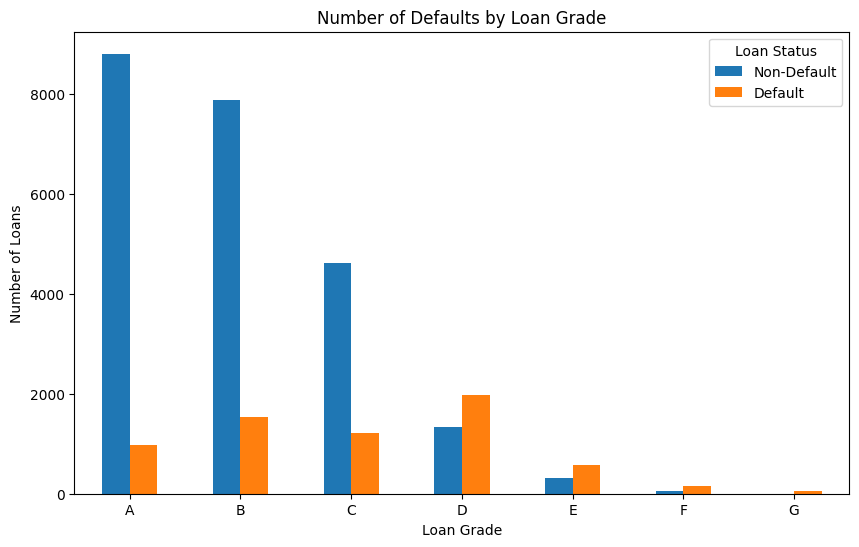

In [6]:
# Group by loan_grade and loan_status and count the occurrences
defaults_by_grade = loan_data.groupby(['loan_grade', 'loan_status']).size().unstack(fill_value=0)

# Plotting the bar chart
defaults_by_grade.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Number of Defaults by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])
plt.show()

In our dataset,loans with grades A-C rarely default, while the majority of the loans fall within this range. Once we reach loans in grade D, the loans default at a higher rate than not defaulting.

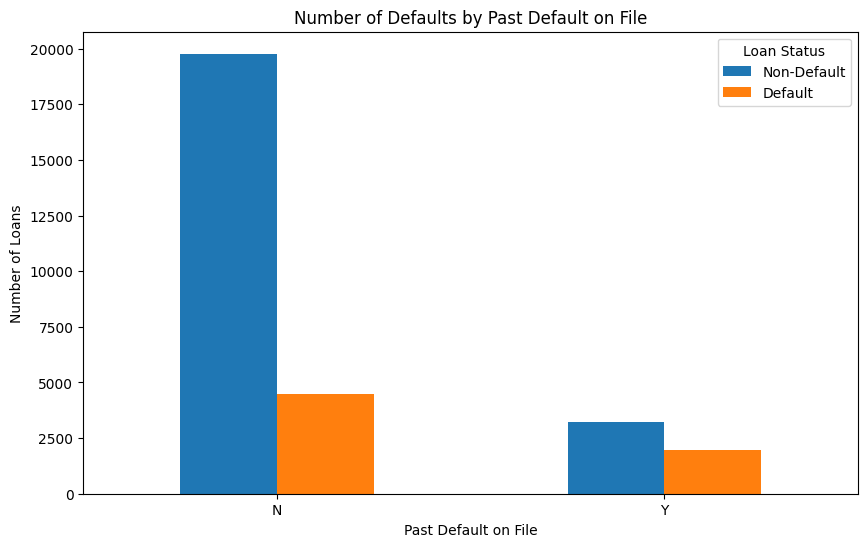

In [7]:
# Group by cb_person_default_on_file and loan_status and count the occurrences
defaults_by_past_default = loan_data.groupby(['cb_person_default_on_file', 'loan_status']).size().unstack(fill_value=0)

# Plotting the bar chart
defaults_by_past_default.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Number of Defaults by Past Default on File')
plt.xlabel('Past Default on File')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])
plt.show()

In [8]:
# Calculate the default rate for each group
defaults_by_past_default['default_rate'] = defaults_by_past_default[1] / (defaults_by_past_default[0] + defaults_by_past_default[1])

# Display the DataFrame with the new column
display(defaults_by_past_default)

loan_status,0,1,default_rate
cb_person_default_on_file,,,
N,19770,4482,0.184810
Y,3231,1982,0.380203


The majority of loan applicants in our dataset had not previously defaulted on a loan. Those who had previous defaults had a default rate (37.8%) double the rate of those who had not previously defaulted (18.4%).

## Prepping Data for Models

In [9]:
#trimming dataset down
model_data = loan_data[['loan_grade', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'loan_status', 'cb_person_cred_hist_length']]

#creating dummy variables for categorical data
model_data = pd.get_dummies(model_data, columns=['loan_grade', 'cb_person_default_on_file'])
model_data['loan_grade_A'] = model_data['loan_grade_A'].astype(int)
model_data['loan_grade_B'] = model_data['loan_grade_B'].astype(int)
model_data['loan_grade_C'] = model_data['loan_grade_C'].astype(int)
model_data['loan_grade_D'] = model_data['loan_grade_D'].astype(int)
model_data['loan_grade_E'] = model_data['loan_grade_E'].astype(int)
model_data['loan_grade_F'] = model_data['loan_grade_F'].astype(int)
model_data['loan_grade_G'] = model_data['loan_grade_G'].astype(int)
model_data['cb_person_default_on_file_N'] = model_data['cb_person_default_on_file_N'].astype(int)
model_data['cb_person_default_on_file_Y'] = model_data['cb_person_default_on_file_Y'].astype(int)

model_data

,loan_int_rate,loan_percent_income,loan_status,cb_person_cred_hist_length,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,16.02,0.59,1,3,0,0,0,1,0,0,0,0,1
1,11.14,0.10,0,2,0,1,0,0,0,0,0,1,0
2,12.87,0.57,1,3,0,0,1,0,0,0,0,1,0
3,15.23,0.53,1,2,0,0,1,0,0,0,0,1,0
4,14.27,0.55,1,4,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,13.16,0.11,0,30,0,0,1,0,0,0,0,1,0
32577,7.49,0.15,0,19,1,0,0,0,0,0,0,1,0
32578,10.99,0.46,1,28,0,1,0,0,0,0,0,1,0
32579,11.48,0.10,0,26,0,1,0,0,0,0,0,1,0


## Splitting into Training, Validation, and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

#setting target and predictor variables
y = model_data['loan_status']
X = model_data.drop(columns=['loan_status'])

#initial split of test and training set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

# extra step to split validation set from training set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,        # 0.25 x 0.8 = 0.20 of total data
    stratify=y_train_val,
    random_state=42,
)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(17679, 12) (17679,)
(5893, 12) (5893,)
(5893, 12) (5893,)


# Model Testing

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#played with different parameters, eventually settled on 1000 n_estimators and a balanced class weight
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)[:, 1]

#recording performance metrics to be used
rf_accuracy = accuracy_score(y_val, y_pred)
rf_precision = precision_score(y_val, y_pred)
rf_recall = recall_score(y_val, y_pred)
rf_f1 = f1_score(y_val, y_pred)
rf_roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"ROC AUC Score: {rf_roc_auc}")


Accuracy: 0.8060410656711352
Precision: 0.5596184419713831
Recall: 0.5444702242846094
F1 Score: 0.5519404155233242
ROC AUC Score: 0.8119098658327448


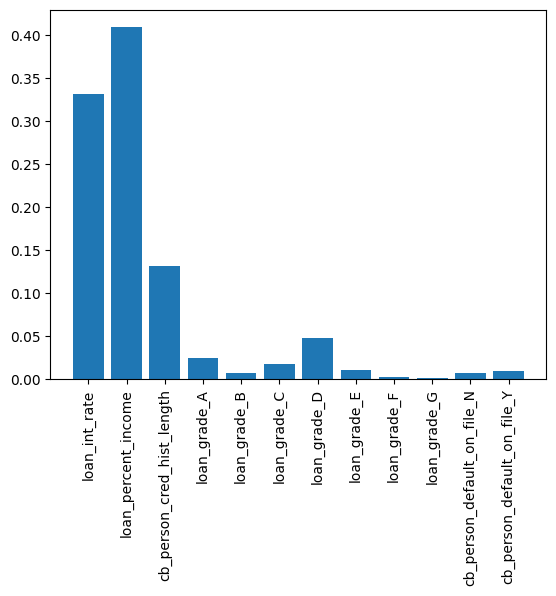

In [13]:
#feature importance
plt.bar(x=X.columns,height=rf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## SVM Classifier

In [15]:
from sklearn.svm import SVC

#used following parameters, eventuall changed to a balanced class weight
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)
y_pred_proba = svm_model.predict_proba(X_val)[:, 1]

#key performance metrics
svm_accuracy = accuracy_score(y_val, y_pred)
svm_precision = precision_score(y_val, y_pred)
svm_recall = recall_score(y_val, y_pred)
svm_f1 = f1_score(y_val, y_pred)
svm_roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"ROC AUC Score: {svm_roc_auc}")

Accuracy: 0.8114712370609197
Precision: 0.5716535433070866
Recall: 0.5614849187935035
F1 Score: 0.5665236051502146
ROC AUC Score: 0.8207686875819631


In [16]:
from sklearn.inspection import permutation_importance

#using permutation importance to understand which features are most important to model performance
results = permutation_importance(svm_model, X_val, y_val, scoring='f1', n_repeats=10, random_state=42)

#printing permutation importance results
for feature, importance in zip(X_test.columns, results.importances_mean):
    print(f"{feature}: {importance:.4f}")

loan_int_rate: 0.0280
loan_percent_income: 0.1010
cb_person_cred_hist_length: -0.0144
loan_grade_A: -0.0106
loan_grade_B: 0.0215
loan_grade_C: 0.0394
loan_grade_D: 0.0196
loan_grade_E: 0.0011
loan_grade_F: -0.0002
loan_grade_G: -0.0001
cb_person_default_on_file_N: -0.0005
cb_person_default_on_file_Y: -0.0005


## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

#using 1000 max iterations and a balanced class weight
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
y_pred_proba = lr.predict_proba(X_val)[:, 1]

#key performance metrics
lr_accuracy = accuracy_score(y_val, y_pred)
lr_precision = precision_score(y_val, y_pred)
lr_recall = recall_score(y_val, y_pred)
lr_f1 = f1_score(y_val, y_pred)
lr_roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")
print(f"ROC AUC Score: {lr_roc_auc}")

Accuracy: 0.7933141014763279
Precision: 0.5201288244766505
Recall: 0.7494199535962877
F1 Score: 0.6140684410646388
ROC AUC Score: 0.8305681092168534


In [18]:
#logistic regression coefficients
coefs = lr.coef_[0]

#printing coefficients
for feature, coef in zip(X_test.columns, coefs):
    print(f"{feature}: {coef}")

loan_int_rate: 0.05647770636444282
loan_percent_income: 8.52284773767883
cb_person_cred_hist_length: -0.00612623455559786
loan_grade_A: -1.8050618792981061
loan_grade_B: -1.5091986483178144
loan_grade_C: -1.189332480700339
loan_grade_D: 0.6425517669682179
loan_grade_E: 0.673663794738257
loan_grade_F: 0.807526097878078
loan_grade_G: 1.736608693769425
cb_person_default_on_file_N: -0.30972905508033977
cb_person_default_on_file_Y: -0.3335135998821605


## Neural Network

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

#scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#setting a balanced class weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

#creating model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')   # single neuron for binary classification
])

#compiling model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#fitting model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=0, class_weight=class_weights)

y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

#key model performance metrics
nn_accuracy = accuracy_score(y_val, y_pred)
nn_precision = precision_score(y_val, y_pred)
nn_recall = recall_score(y_val, y_pred)
nn_f1 = f1_score(y_val, y_pred)
nn_roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Accuracy:  {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall:    {nn_recall:.4f}")
print(f"F1 Score:  {nn_f1:.4f}")
print(f"ROC AUC:   {nn_roc_auc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.8091
Precision: 0.5481
Recall:    0.7401
F1 Score:  0.6298
ROC AUC:   0.8355


# Comparing Validation Set Results

In [22]:
#creating results dataframe
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network'],
    'Accuracy': [rf_accuracy, svm_accuracy, lr_accuracy, nn_accuracy],
    'Precision': [rf_precision, svm_precision, lr_precision, nn_precision],
    'Recall': [rf_recall, svm_recall, lr_recall, nn_recall],
    'F1 Score': [rf_f1, svm_f1, lr_f1, nn_f1],
    'ROC AUC': [rf_roc_auc, svm_roc_auc, lr_roc_auc, nn_roc_auc]
})

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Random Forest,0.806041,0.559618,0.544470,0.551940,0.811910
1,SVM,0.811471,0.571654,0.561485,0.566524,0.820769
2,Logistic Regression,0.793314,0.520129,0.749420,0.614068,0.830568
3,Neural Network,0.809096,0.548110,0.740139,0.629812,0.835505


In comparing my model results, the model that performs the best across the metrics (excluding accuracy due to class imbalance) is the neural network, having the highest recall, F1 score, and ROC AUC. The issue with choosing the neural network is that it is not very interpretable, meaning there is no intuitive way to understand the impact of each variable. Neural Netowrks also take much longer to run than the other models used. Given this, Logistic Regression would likely be a better choice of model as it is more easily interpreted and performed the best out of the other models. I will choose Logistic Regression as my model to perform my final test on.

## Using Test Set

In [25]:
#recreating logistic regression model
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")
print(f"ROC AUC Score: {lr_roc_auc}")

Accuracy: 0.8001018157135584
Precision: 0.5316455696202531
Recall: 0.7470997679814385
F1 Score: 0.6212218649517685
ROC AUC Score: 0.8329192306399005
